In [1]:
from func_model_methods  import *
from func_sampling_methods import *
from func_data import*


df=pd.read_csv(r"D:\data\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0}) # zmieniamy wartości na Boolean
print(df.shape)
df.dropna # odrzucamy wiersze z wartościami NaN
df.shape




(1470, 35)


(1470, 35)

Zrobić inny zbiór, temat roboczy: Wyzywania w procesie budowania pipelinów danych. data_set ekonomiczny, zdrowotny

In [2]:
# zmienna określana Attrition
Y = df['Attrition'].values
X = df.drop(['Attrition','StandardHours','Over18','EmployeeCount','TotalWorkingYears','EmployeeNumber'], axis=1)

####'YearsAtCompany','YearsInCurrentRole',
###             'YearsSinceLastPromotion', 'YearsWithCurrManager''JobLevel',
print(X.shape)

(1470, 29)


Old Shape:  (1470, 35)
New Shape:  (1458, 35)


C:\Users\karol\AppData\Local\Temp\ipykernel_29788\1129647696.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  remove_outliers_pos(df,column_name='MonthlyIncome')


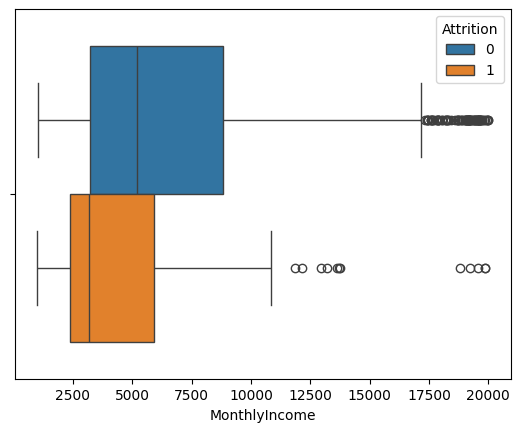

In [3]:
remove_outliers_pos(df,column_name='MonthlyIncome')

Old Shape:  (1458, 35)
New Shape:  (1377, 35)


C:\Users\karol\AppData\Local\Temp\ipykernel_29788\1513729800.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  remove_outliers_neg(df,column_name="MonthlyIncome")


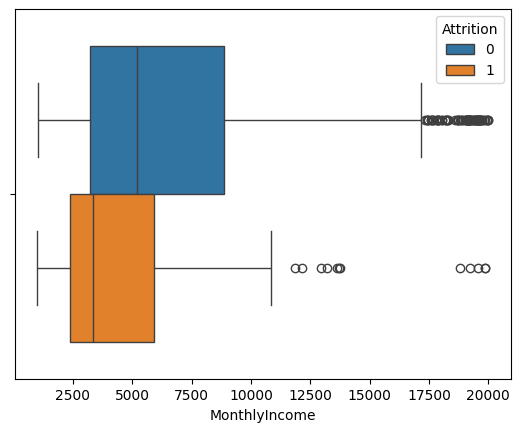

In [4]:
remove_outliers_neg(df,column_name="MonthlyIncome")

In [5]:
n_positive,n_negative=get_value_distribution(Y)

Number of positive: 237, number of negative: 1233


In [6]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.0,1377.000000,1377.000000,1377.000000,1377.000000,...,1377.000000,1377.0,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000
mean,36.931009,0.161946,806.448802,9.161220,2.928105,1.0,1044.769789,2.732026,66.010167,2.730574,...,2.721133,80.0,0.790850,11.331155,2.801017,2.763253,7.015977,4.262164,2.214234,4.116921
std,9.130770,0.368535,402.124535,8.072627,1.022950,0.0,603.603720,1.091763,20.348702,0.713778,...,1.079983,0.0,0.846403,7.859920,1.282564,0.710603,6.137810,3.637894,3.250201,3.562378
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,469.000000,2.000000,2.000000,1.0,510.000000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,806.000000,7.000000,3.000000,1.0,1046.000000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1583.000000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
data_split=dataset_split(X,Y,test_size=0.15)

In [8]:
#listy samplingów do sprawdzenia
func_list=[data_oversampling,data_smote]
func_list_2=[data_adasyn,data_smote_tomek]

In [9]:
params_xgb_boost= {
        'min_child_weight': [1, 2, 5],
        'gamma': [0.5, 1],
        'subsample': [0.6,1.0],
        'colsample_bytree': [0.6,1.0],
        'max_depth': [3, 6, 10]
        }

{'xgbmodel__colsample_bytree': 0.6, 'xgbmodel__gamma': 1, 'xgbmodel__max_depth': 10, 'xgbmodel__min_child_weight': 5, 'xgbmodel__subsample': 0.6}
Best Threshold=1.000000, G-mean=0.416


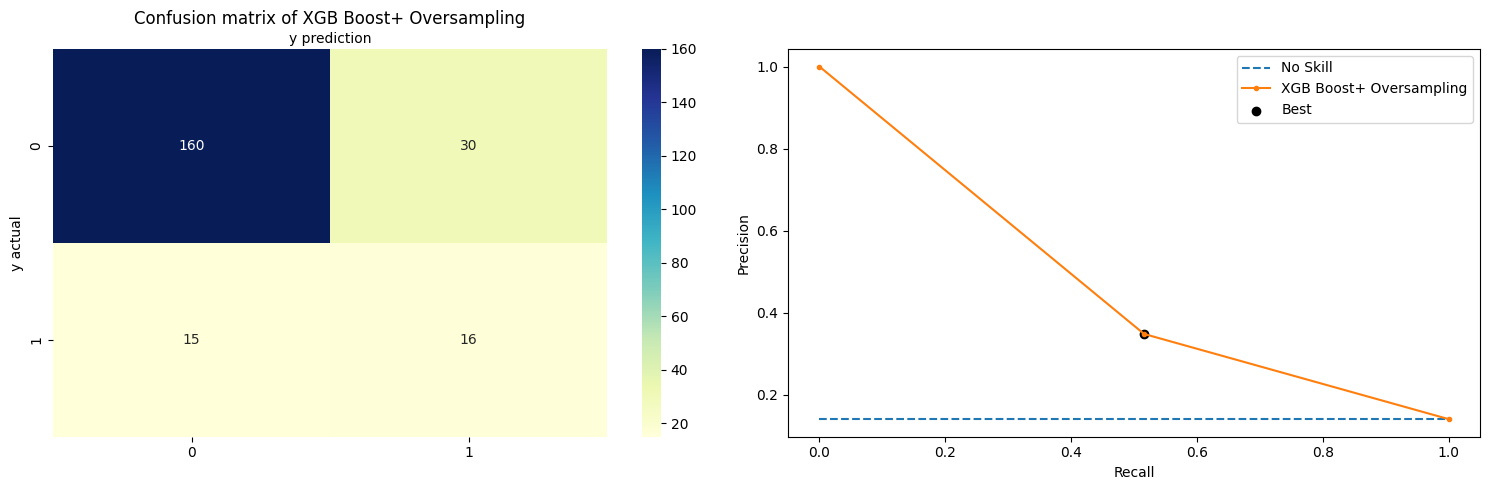

c:\Users\karol\Desktop\machine_learning\licnecnjat\func_model_methods.py:190: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score=df_score.append(pd.Series(ndf, index=df_score.columns[:len(ndf)]), ignore_index=True)


{'xgbmodel__colsample_bytree': 0.6, 'xgbmodel__gamma': 0.5, 'xgbmodel__max_depth': 3, 'xgbmodel__min_child_weight': 5, 'xgbmodel__subsample': 0.6}
Best Threshold=1.000000, G-mean=0.435


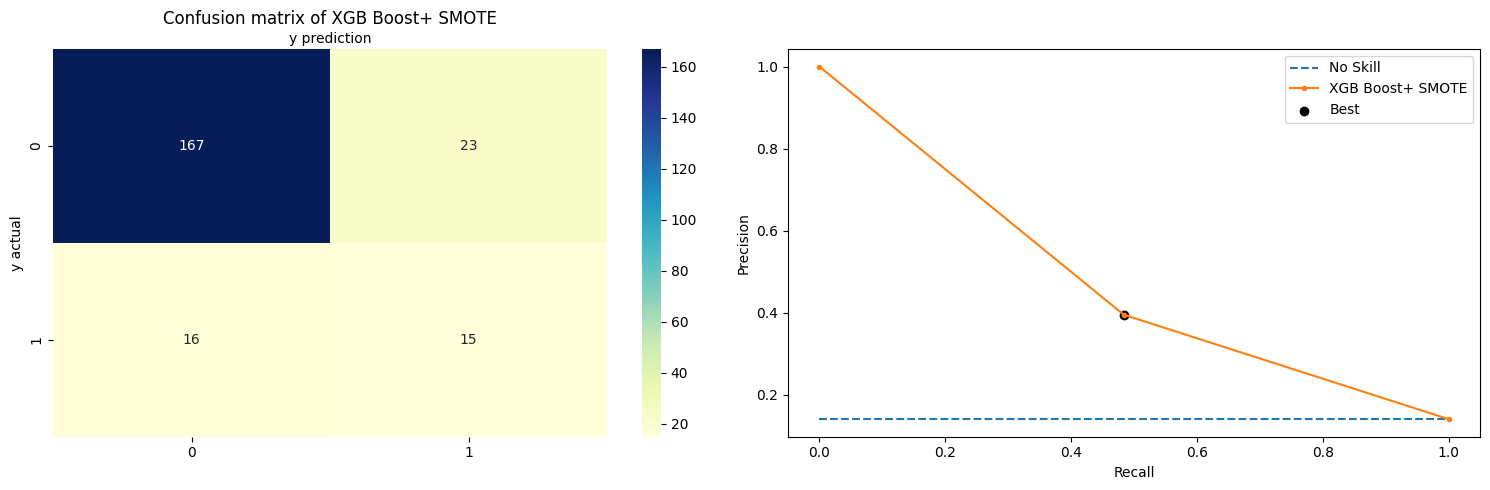

c:\Users\karol\Desktop\machine_learning\licnecnjat\func_model_methods.py:190: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score=df_score.append(pd.Series(ndf, index=df_score.columns[:len(ndf)]), ignore_index=True)


,XGB Boost,Recall 0,Precision 0,Recall 1,Precision 1,F1 Score,Accuracy,Roc Auc
0,Oversampling,0.842105,0.914286,0.516129,0.347826,0.415584,0.796380,0.745331
1,SMOTE,0.878947,0.912568,0.483871,0.394737,0.434783,0.823529,0.767572


In [10]:
xgb_boost_classifier(func_list,params_xgb_boost,data_split)

{'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 50}
Best Threshold=1.000000, G-mean=0.305


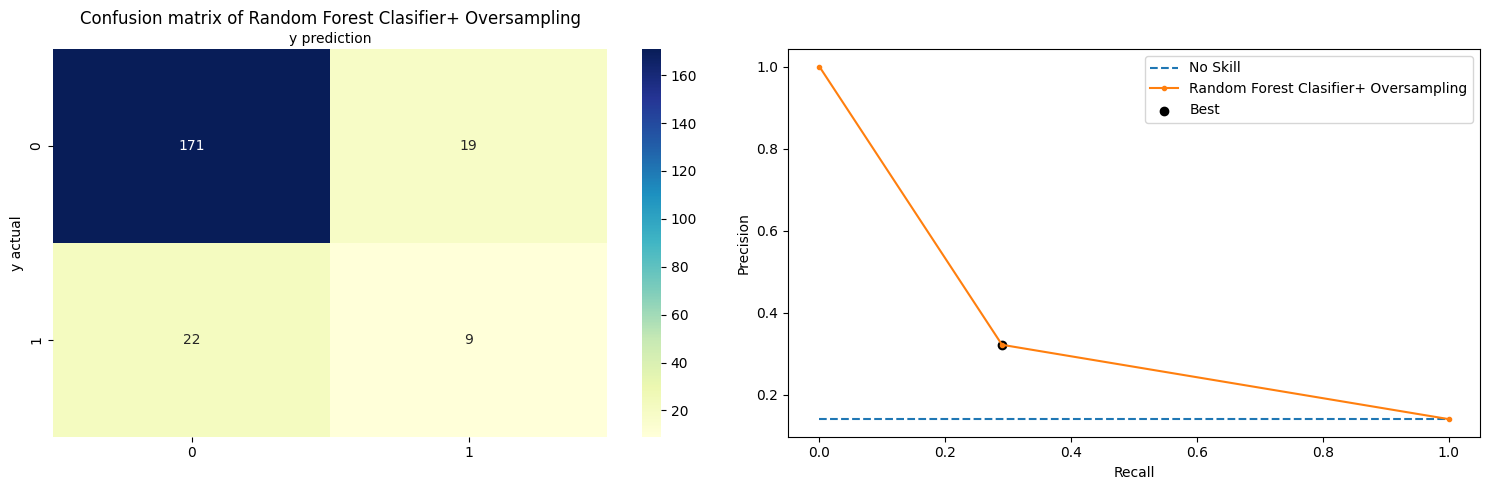

c:\Users\karol\Desktop\machine_learning\licnecnjat\func_model_methods.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score=df_score.append(pd.Series(ndf, index=df_score.columns[:len(ndf)]), ignore_index=True)


{'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 30}
Best Threshold=1.000000, G-mean=0.273


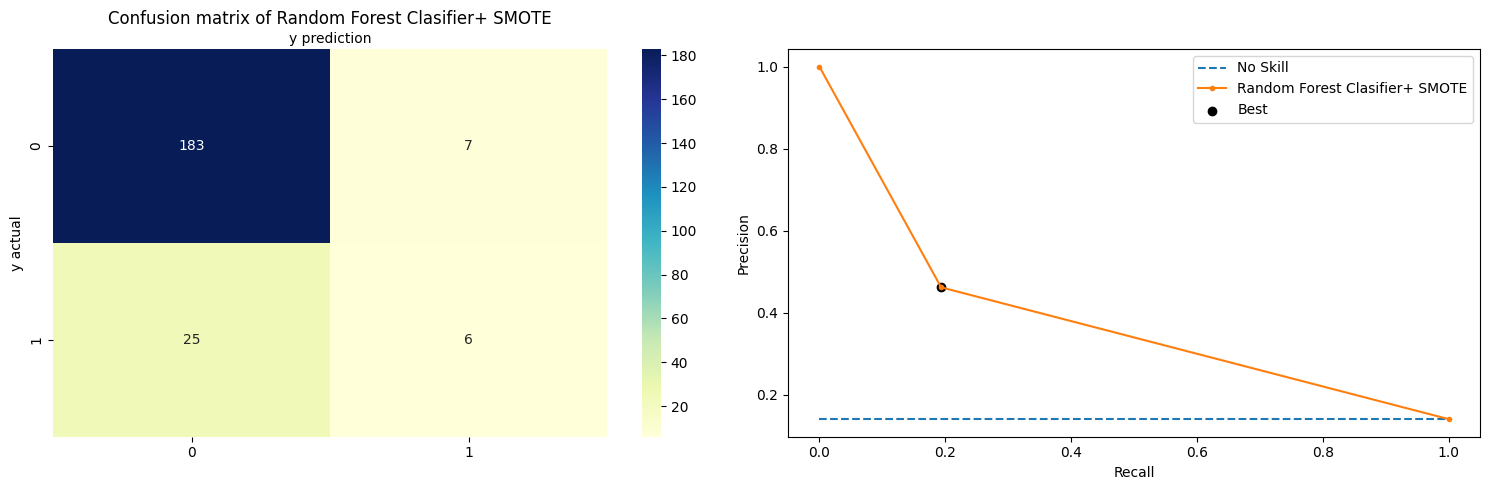

c:\Users\karol\Desktop\machine_learning\licnecnjat\func_model_methods.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score=df_score.append(pd.Series(ndf, index=df_score.columns[:len(ndf)]), ignore_index=True)


,Random Forest,Recall 0,Precision 0,Recall 1,Precision 1,F1 Score,Accuracy,Roc Auc
0,Oversampling,0.900000,0.886010,0.290323,0.321429,0.305085,0.814480,0.706452
1,SMOTE,0.963158,0.879808,0.193548,0.461538,0.272727,0.855204,0.697963


In [11]:
params_random_forest={'max_depth': [5, 10, None],
                    'min_samples_split': [10, 30, 50],
                    'min_samples_leaf': [1, 2, 3]}
random_forest(func_list,params_random_forest,data_split)

Best Threshold=1.000000, G-mean=0.340


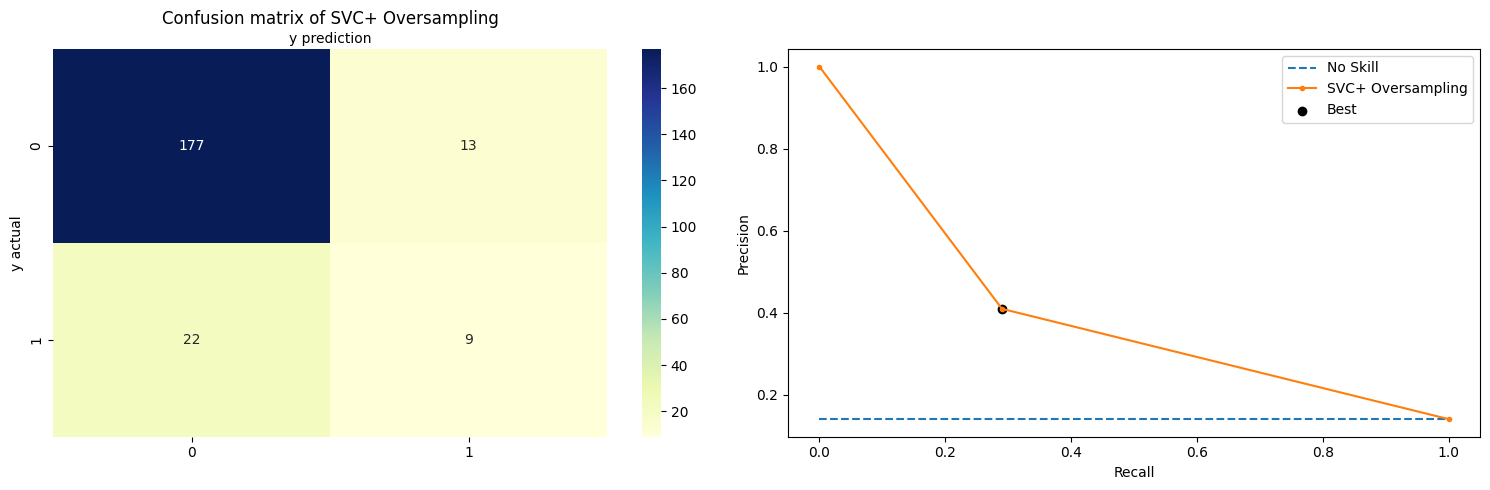

c:\Users\karol\Desktop\machine_learning\licnecnjat\func_model_methods.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score=df_score.append(pd.Series(ndf, index=df_score.columns[:len(ndf)]), ignore_index=True)


Best Threshold=1.000000, G-mean=0.340


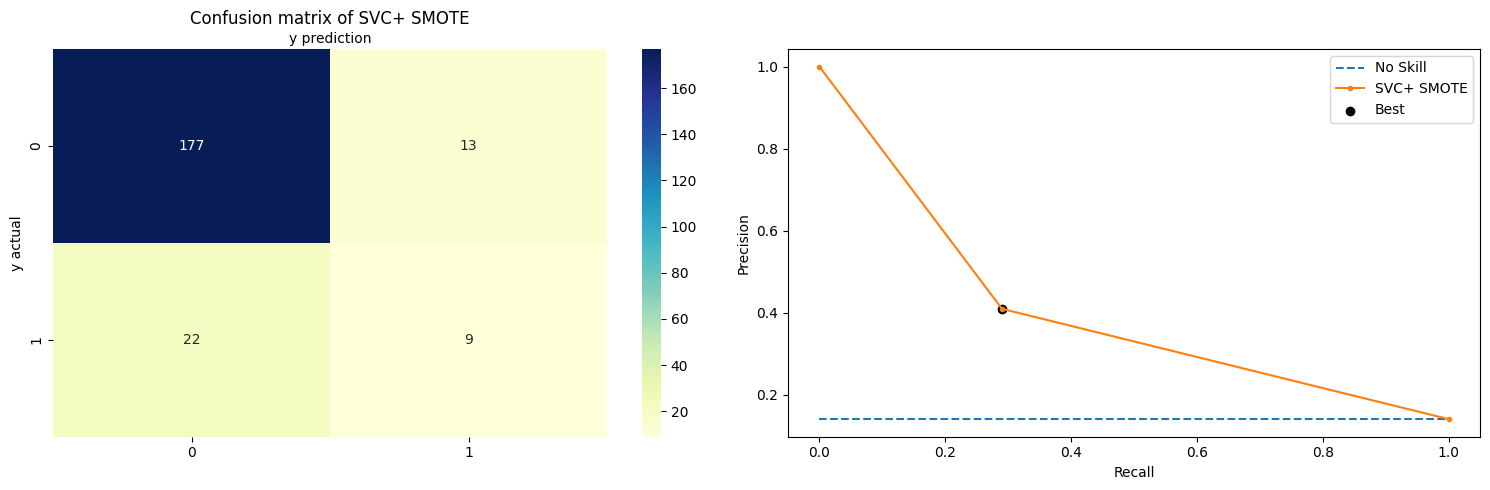

c:\Users\karol\Desktop\machine_learning\licnecnjat\func_model_methods.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score=df_score.append(pd.Series(ndf, index=df_score.columns[:len(ndf)]), ignore_index=True)


,SVC with,Recall 0,Precision 0,Recall 1,Precision 1,F1 Score,Accuracy,Roc Auc
0,Oversampling,0.931579,0.889447,0.290323,0.409091,0.339623,0.841629,0.692869
1,SMOTE,0.931579,0.889447,0.290323,0.409091,0.339623,0.841629,0.692869


In [12]:
paramas_svc={"C": [1,5,10],
            "gamma":[1e-07,1e-08,1e-09],
            "kernel":["linear","rbf"]
            }
svc(func_list,paramas_svc,data_split)

In [13]:
params_rus={
     "sampling_strategy":['majority','auto']
    
}
rus_boost_classifier(params_rus,data_split)

KeyboardInterrupt: 

{'balanced_bagging_model__max_depth': None, 'balanced_bagging_model__min_samples_leaf': 1, 'balanced_bagging_model__min_samples_split': 50, 'balanced_bagging_model__n_estimators': 500, 'balanced_bagging_model__sampling_strategy': 'majority'}
Best Threshold=1.000000, G-mean=0.362


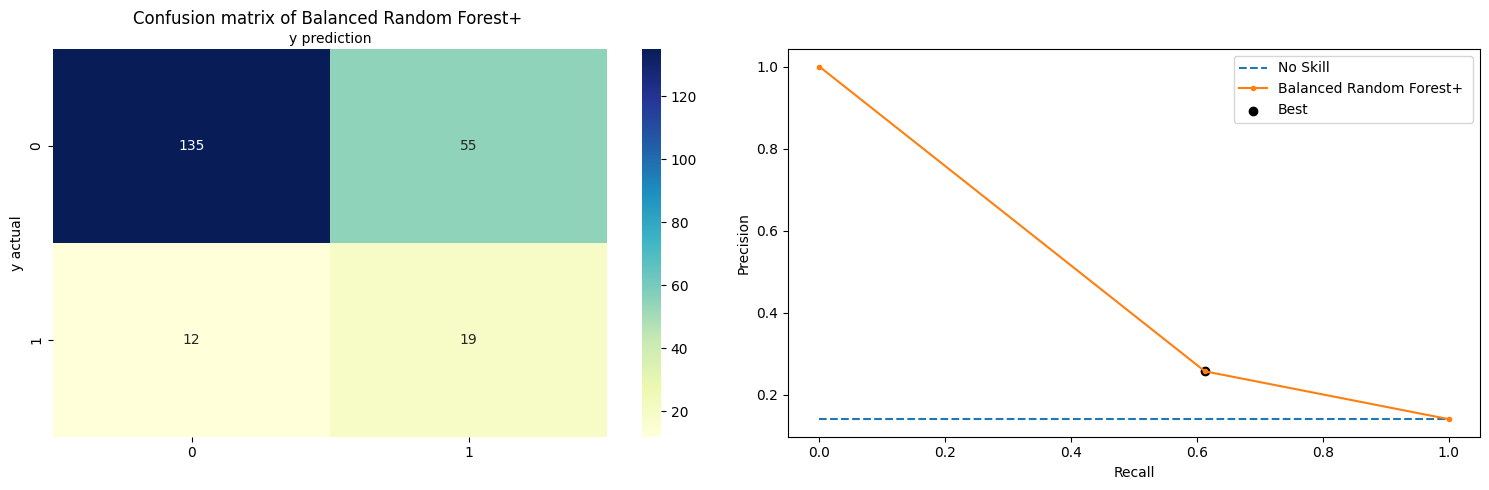

c:\Users\karol\Desktop\machine_learning\licnecnjat\func_model_methods.py:228: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score=df_score.append(pd.Series(ndf, index=df_score.columns[:len(ndf)]), ignore_index=True)


,Balanced Random Forest,Recall 0,Precision 0,Recall 1,Precision 1,F1 Score,Accuracy,Roc Auc
0,,0.710526,0.918367,0.612903,0.256757,0.361905,0.696833,0.68455


In [14]:
params_balanced={
    "n_estimators":[100,300,500],
    "sampling_strategy":['majority','auto'],
    'max_depth': [5, 10, None],
    'min_samples_split': [10, 30, 50],
    'min_samples_leaf': [1, 2, 3]
    }

balanced_random_forest_classifier(params_balanced,data_split)

In [ ]:
params_deciosn_tree = {'max_depth': [5,10,None],
                    'min_samples_split': [10, 30, 50],
                    'min_samples_leaf': [1, 2, 3]}

decison_tree(func_list,params_deciosn_tree)